<a href="https://colab.research.google.com/github/rpizarrog/Curso-de-Python/blob/main/retos/Arbol_de_Clasificaci%C3%B3n_Da%C3%B1o_al_Coraz%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Arbol de Clasificación Daño al Corazón

## Objetivo

Implementar el modelo de regresión logística binariaárbol de clasificcion con datos relacionados a una condición de salud de las personas para predecir anomalías de corazón y evaluar la exactitud del modelo mediante la matriz de confusión.


## Descripción

Se cargan librerías y se descargan los datos: <https://raw.githubusercontent.com/rpizarrog/Curso-de-Python/main/datos/heart_2020_cleaned.csv>

Los datos están relacionados con aspectos médicos y son valores numéricos de varias variables que caracterizan el estado de salud de 319,795 personas.

Se pretende construir un modelo utilizando **algoritmos supervisados** para resolver la **tarea de clasificación binaria** e identificar si una persona padece del corazón o no.

Se construyen datos de entrenamiento y validación al 80% y 20% cada uno.

Se desarrollan los modelos de:

-   Regresión Logística binaria

-   **Árbol de Clasificación tipo class**


Los modelo se aceptan si tienen un valor de exactitud ("*Accuracy*") por encima del 70%..

El modelo se construye con funciones de librerías de *python*

Se predice la condición de salud para una persona con ciertas características de acuerdo a las variables independientes.



## Sustento teórico

Los árboles de clasificación son el subtipo de árboles de predicción que se aplica cuando la variable respuesta dependiente es de tipo categórica o cualitativa y que tiene un significado conforme o de acuerdo a una etiqueta.

La etiqueta puede ser 'BUENO' o 'MALO'; '0' o '1'; 'ALTO' O 'BAJO'; 'ENFERMO, 'NO ENFERMO'; entre otros ejemplos.


## Cargar librerías


In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Estadísticas
import scipy 
from scipy import stats

# Para partir datos entrenamiento y validación
from sklearn.model_selection import train_test_split

# Modelo de Clasificación 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

### Importar datos

In [103]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv")
datos


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Explorando datos

In [ ]:
datos.shape

(319795, 18)

In [104]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Observaciones y variables:  (319795, 18)
Columnas y tipo de dato


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### Visualización de datos

¿Cuántos casos hay de cada clase daño al corazón (HeartDisease)?

Hay 292422 casos sin daño al corazón y el resto que si tienen daño 27373.

In [105]:
frecuencia = (datos.groupby("HeartDisease").agg(frecuencia=("HeartDisease","count")).reset_index())
  
frecuencia

,HeartDisease,frecuencia
0,No,292422
1,Yes,27373


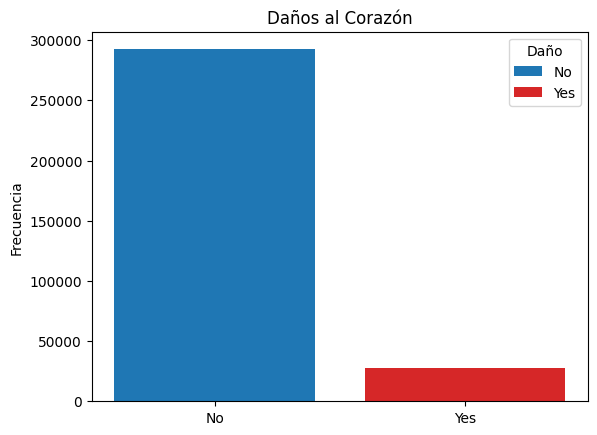

In [106]:
fig, ax = plt.subplots()
# Colores
bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:red']

#frecuencia['frecuencia'].plot(kind="bar")
ax.bar(frecuencia['HeartDisease'], frecuencia['frecuencia'], label=bar_labels, color=bar_colors)

ax.set_ylabel('Frecuencia')
ax.set_title('Daños al Corazón')
ax.legend(title='Daño')

plt.show()

#### Histogramas de datos numéricos

Histograma únicamente de las variables numéricas del conjunto de datos *'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'.*




array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

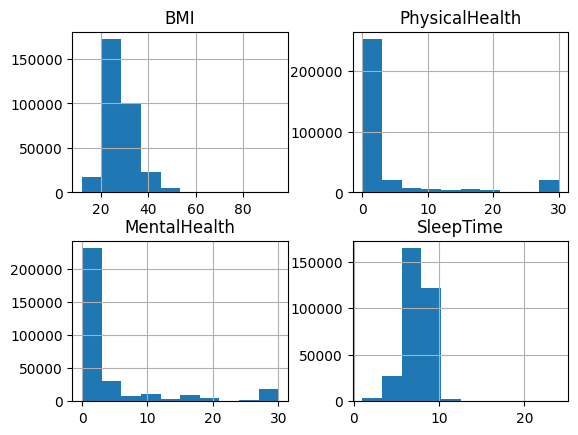

In [107]:
datos[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].hist()

### Transformar datos
Crear variable llamada *HeartDisease01* que se utilizará en el modelo de **Regresión Logística** tendrá valores **0** de para 'No' daño y **1** para si hay daño ('*Yes*').


In [110]:
datos['HeartDisease01'] = np.where(datos ['HeartDisease']== "Yes", 1, 0)

datos.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease01
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0


In [109]:
datos.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease01
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,1
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,0
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,0


#### Quitar la variable HeartDisease


In [111]:
datos = datos.drop("HeartDisease", axis='columns')
datos

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease01
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,1
319791,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0
319792,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,0
319793,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,0


Quedaron las columnas


In [112]:
datos.columns.values

array(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'HeartDisease01'], dtype=object)

### Variables independientes y dependiente

#### Las variables de interés

Todas las variables de entrada o variables independientes:

-   "*BMI*": Indice de masa corporal con valores entre 12.02 y 94.85.

-   "*Smoking*": Si la persona es fumadora o no con valores categóritos de 'Yes' o 'No'.

-   "*AlcoholDrinking*" : Si consume alcohol o no, con valores categóricos de 'Yes' o 'No'.

-   "*Stroke*": Si padece alguna anomalía cerebrovascular, apoplejia o algo similar, con valores categóricos de 'Yes' o 'No'.

-   "*PhysicalHealth*" Estado físico en lo general con valores entre 0 y 30.

-   "*MentalHealth*". Estado mental en lo general con valores entre 0 y 30.

-   "*DiffWalking*" . Que si se le dificulta caminar o tiene algún padecimiento al caminar, con valores categóritoc de 'Yes' o 'No'.

-   "*Sex*": Género de la persona, con valores de 'Female' y 'Male' para distinguir al género femenino y masculino respectivamente.

-   "*AgeCategory*": Una clasificación de la edad de la persona de entre 18 y 80 años. La primera categoría con un rango de edad entre 18-24, a partir de 25 con rangos de 5 en 5 hasta la clase de 75-80 y una última categoría mayores de 80 años.

-   "*Race*". Raza u origen de la persona con valores categóricos de '*American Indian/Alaskan Native', 'Asian','Black', 'Hispanic', 'Other'* y'*White'.*

-   "*Diabetic*". Si padece o ha padecido de diabetes en cuatro condiciones siendo Yes y No para si o no: 'No', 'borderline diabetes' condición antes de detectarse diabetes tipo 2, 'Yes', y 'Yes (during pregnancy)' durante embarazo.

-   "*PhysicalActivity*" que si realiza actividad física, con valores categóricos de 'Yes' o 'No'.

-   "*GenHealth*": EStado general de salud de la persona con valores categóricos de 'Excellent', 'Very good', 'Good', 'Fair' y 'Poor' con significado en español de excelente, muy buena, buena, regular y pobre o deficiente.

-   "*SleepTime*": valor numérico de las horas de sueño u horas que duerme la persona con valores en un rango entre 1 y 24.

-   "*Asthma*": si padece de asma o no, con valores categóricos de 'Yes' o 'No'.

-   "*KidneyDisease*": si tiene algún padecimiento en los riñones, con valores categóricos de 'Yes' o 'No'.

-   "*SkinCancer*": si padece algún tipo de cáncer de piel, con valores categóricos de 'Yes' o 'No'.

La variable de interés como dependiente o variable de salida es la de daño al corazón (*HeartDisease*), con valores categóricos de 'Yes' o 'No' , ahora la variable *HeartDisease01* con valores *'1' o '0'.*

Nuevamente la descripción de variables y ahora son 319795 observaciones y 18 variables

In [113]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Observaciones y variables:  (319795, 18)
Columnas y tipo de dato


BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease01        int64
dtype: object

#### Variables dummys

Las variables ficticias, variables dummy o también conocidas como variables indicadoras son «variables artificiales» creadas para representar un atributo con dos o más niveles o categorías diferentes.

Ejemplo género Femenino y Masculino, 0 para Femenino y 1 para Masculino o viceversa.

Estado civil: Casado, Soltero, Divorciado, Viudo. [0,1,2,3]

En el conjunto de datos, existen variables que son categóricas: *'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'*.

Con estas variables, crear variables *Dummys* y construir un conjunto de datos que incluye las variable *dummys*.

El método de la librería de Pandas llamado *get_dummies()* convierte los datos categóricos en variables indicadoras o ficticias.

Se convirtieron a variables dummys todas las que se especificaron dejando las numéricas como estaban así como la variable dependiente *HeartDisease01*


In [114]:
datos_dummis = pd.get_dummies(datos, drop_first = True)
datos_dummis

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease01,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [115]:
datos_dummis.dtypes

BMI                                 float64
PhysicalHealth                      float64
MentalHealth                        float64
SleepTime                           float64
HeartDisease01                        int64
Smoking_Yes                           uint8
AlcoholDrinking_Yes                   uint8
Stroke_Yes                            uint8
DiffWalking_Yes                       uint8
Sex_Male                              uint8
AgeCategory_25-29                     uint8
AgeCategory_30-34                     uint8
AgeCategory_35-39                     uint8
AgeCategory_40-44                     uint8
AgeCategory_45-49                     uint8
AgeCategory_50-54                     uint8
AgeCategory_55-59                     uint8
AgeCategory_60-64                     uint8
AgeCategory_65-69                     uint8
AgeCategory_70-74                     uint8
AgeCategory_75-79                     uint8
AgeCategory_80 or older               uint8
Race_Asian                      

#### Mover columna HearthDisease01

Mover *HearthDisease01* a la primera posición 

In [116]:
columna = datos_dummis.pop('HeartDisease01') # El método pop() elimina y retorna un elemento 

# ¿Cuál es la última columna?
datos_dummis.insert(0, 'HeartDisease01', columna)
datos_dummis

,HeartDisease01,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,0,20.34,0.0,0.0,7.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,8.0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,0,24.21,0.0,0.0,6.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,23.71,28.0,0.0,8.0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,6.0,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,0,29.84,0.0,0.0,5.0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,0,24.24,0.0,0.0,6.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,0,32.81,0.0,0.0,12.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [117]:
datos_dummis.dtypes

HeartDisease01                        int64
BMI                                 float64
PhysicalHealth                      float64
MentalHealth                        float64
SleepTime                           float64
Smoking_Yes                           uint8
AlcoholDrinking_Yes                   uint8
Stroke_Yes                            uint8
DiffWalking_Yes                       uint8
Sex_Male                              uint8
AgeCategory_25-29                     uint8
AgeCategory_30-34                     uint8
AgeCategory_35-39                     uint8
AgeCategory_40-44                     uint8
AgeCategory_45-49                     uint8
AgeCategory_50-54                     uint8
AgeCategory_55-59                     uint8
AgeCategory_60-64                     uint8
AgeCategory_65-69                     uint8
AgeCategory_70-74                     uint8
AgeCategory_75-79                     uint8
AgeCategory_80 or older               uint8
Race_Asian                      

## Datos de entrenamiento y validación

Datos de entrenamiento al 80% de los datos y 20% los datos de validación. Semilla 2023





In [133]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos_dummis.drop(columns = "HeartDisease01"), datos_dummis['HeartDisease01'],train_size = 0.80,  random_state = 2023)

### Datos de entrenamiento

In [119]:
X_entrena

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
178502,33.38,0.0,0.0,5.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
250563,30.52,30.0,0.0,9.0,1,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
214036,27.94,0.0,0.0,7.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
123417,27.26,0.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
198819,31.09,14.0,14.0,8.0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39427,23.43,2.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
169889,25.04,0.0,0.0,6.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
182967,28.70,0.0,0.0,2.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
178630,40.69,0.0,15.0,5.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Datos de validación

In [120]:
X_valida

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
195315,46.00,0.0,2.0,7.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
281729,22.89,0.0,5.0,7.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
178127,26.63,20.0,10.0,7.0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
94196,24.21,0.0,20.0,6.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
110390,20.18,0.0,0.0,7.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293701,25.84,0.0,0.0,7.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
54992,38.37,30.0,3.0,5.0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
229803,25.09,0.0,0.0,10.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
98520,18.75,0.0,0.0,5.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


### Modelos Supervisados de Clasificación

Se construye un modelo de árbol de clasificación con los datos de entrenamiento y las variables independientes.




In [134]:
modelo_ac = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 2023
          )

In [135]:
modelo_ac.fit(X_entrena, Y_entrena)

DecisionTreeClassifier(max_depth=5, random_state=2023)

### Visualización de árbol



Profundidad del árbol: 5
Número de nodos terminales: 32


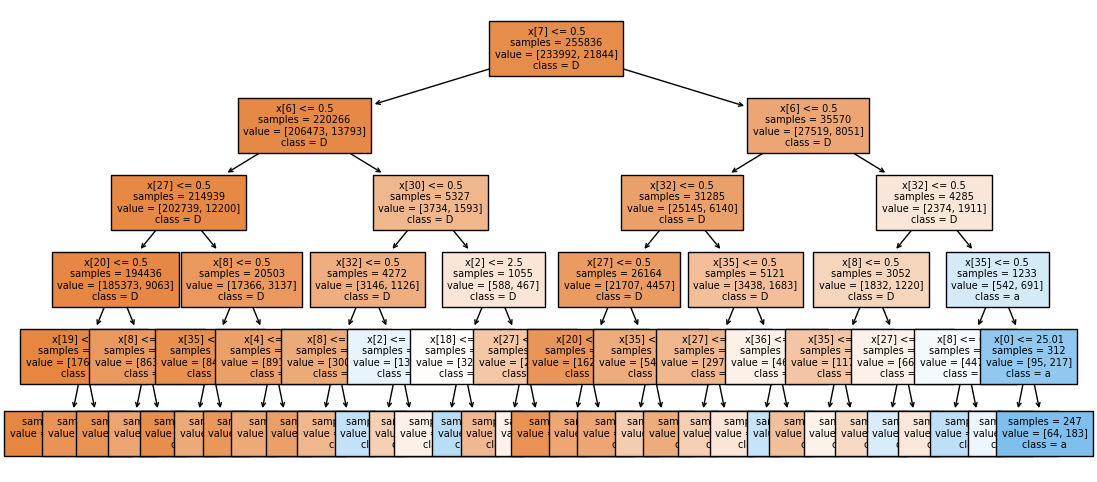

In [136]:
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo_ac.get_depth()}")
print(f"Número de nodos terminales: {modelo_ac.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_ac,
            #feature_names = modelo_ac.tolist(),
            class_names   = 'Daño al corazón',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

### Reglas del arbol


In [149]:
texto_modelo = export_text(
                    decision_tree = modelo_ac,
                    feature_names = list(datos_dummis.drop(columns = "HeartDisease01").columns)
               )
print(texto_modelo)

|--- DiffWalking_Yes <= 0.50
|   |--- Stroke_Yes <= 0.50
|   |   |--- Diabetic_Yes <= 0.50
|   |   |   |--- AgeCategory_80 or older <= 0.50
|   |   |   |   |--- AgeCategory_75-79 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AgeCategory_75-79 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- AgeCategory_80 or older >  0.50
|   |   |   |   |--- Sex_Male <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Sex_Male >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Diabetic_Yes >  0.50
|   |   |   |--- Sex_Male <= 0.50
|   |   |   |   |--- KidneyDisease_Yes <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- KidneyDisease_Yes >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Sex_Male >  0.50
|   |   |   |   |--- Smoking_Yes <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Smoking_Yes >  0.50
|   |   |   |   |   |--- class: 0
|   |--- Stroke_Yes >  0.50
|   |   |--- GenHealth_Fair <= 0.50
|   |   |   |--- GenHealth_

### Predicciones

Se hacen predicciones con el modelo árbol de clasificación con los datos de validación y se contruye tabla comparativa para evaluar con la herramienta matriz de confusión.

In [150]:
predicciones = modelo_ac.predict(X_valida)
print(predicciones)

[0 0 0 ... 0 0 0]


### Tabla comparativa para evaluar

Se crea tabla comparativa para comparar predicciones contra lo real. Se muetran las dos columnas y lo real de daño del corazoj y la prediccón

La pregunta es: ¿A cuántos casos le atina el modelo? Accuracy




In [151]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(HeartDisease_Real = Y_valida)
comparaciones = comparaciones.assign(HeartDisease_Pred = predicciones.flatten().tolist())
print(comparaciones[['BMI', 'PhysicalHealth', 'HeartDisease_Real', 'HeartDisease_Pred']])

          BMI  PhysicalHealth  HeartDisease_Real  HeartDisease_Pred
195315  46.00             0.0                  0                  0
281729  22.89             0.0                  0                  0
178127  26.63            20.0                  1                  0
94196   24.21             0.0                  0                  0
110390  20.18             0.0                  0                  0
...       ...             ...                ...                ...
293701  25.84             0.0                  0                  0
54992   38.37            30.0                  0                  0
229803  25.09             0.0                  0                  0
98520   18.75             0.0                  0                  0
61909   29.29            30.0                  0                  0

[63959 rows x 4 columns]


### Evaluación del modelo

Se evalúa el **modelo** con la matriz de confusión.


In [152]:
print(confusion_matrix(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))


[[58238   192]
 [ 5273   256]]


#### A cuántos le atina el modelo


$$
Accuracy = \frac{VP + VN}{VP + FP + VN + FN}
$$

In [143]:
print(classification_report(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58430
           1       0.57      0.05      0.09      5529

    accuracy                           0.91     63959
   macro avg       0.74      0.52      0.52     63959
weighted avg       0.89      0.91      0.88     63959



In [142]:
(58238 + 256) / (58238 + 192 + 5273 + 256)

0.9145546365640489

### Accuracy



In [153]:
accuracy = accuracy_score(
    y_true = comparaciones['HeartDisease_Real'],
    y_pred = comparaciones['HeartDisease_Pred'],
    normalize = True
    )
print(f"El estadístico accuracy es: {100 * accuracy} %")

El estadístico accuracy es: 91.45546365640489 %


El modelo le atina aproximadamente al 91%, *accuracy* = 91.45%

### Prediciones con un nuevo registro



In [154]:
# Se crea un diccionario
registro = {'BMI': 38, 'PhysicalHealth': 2, 'MentalHealth': 5, 'SleepTime' : 12, 'Smoking_Yes' : 1, 'AlcoholDrinking_Yes' : 1, 'Stroke_Yes' : 1, 'DiffWalking_Yes': 1, 'Sex_Male': 1, 
'AgeCategory_25-29' : 0, 'AgeCategory_30-34' : 0, 
'AgeCategory_35-39' : 0, 'AgeCategory_40-44' : 0, 
'AgeCategory_45-49' : 0, 'AgeCategory_50-54' : 0,
'AgeCategory_55-59' : 0, 'AgeCategory_60-64' : 0,
'AgeCategory_65-69' : 0, 'AgeCategory_70-74': 1, 
'AgeCategory_75-79' : 0, 'AgeCategory_80 or older' : 0,         'Race_Asian' : 0, 'Race_Black' : 1, 'Race_Hispanic' : 0,
'Race_Other' : 0, 'Race_White' : 0,
'Diabetic_No, borderline diabetes' : 0, 'Diabetic_Yes' : 1,
'Diabetic_Yes (during pregnancy)' : 0, 
'PhysicalActivity_Yes' : 0, 'GenHealth_Fair' : 1, 
'GenHealth_Good' : 0, 'GenHealth_Poor' : 0, 
'GenHealth_Very good' : 0, 'Asthma_Yes' : 1, 'KidneyDisease_Yes':1, 'SkinCancer_Yes': 0}
persona1 = pd.DataFrame()
persona1 = persona1.append(registro, ignore_index=True)
persona1


<ipython-input-154-332c42aa7846>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,38,2,5,12,1,1,1,1,1,0,...,1,0,0,1,0,0,0,1,1,0


O bien con función concat()


In [155]:
# Se crea un diccionario
registro = {'BMI': 30, 'PhysicalHealth': 1, 'MentalHealth': 4, 'SleepTime' : 6, 'Smoking_Yes' : 1, 'AlcoholDrinking_Yes' : 1, 'Stroke_Yes' : 1, 'DiffWalking_Yes': 1, 'Sex_Male': 1, 
'AgeCategory_25-29' : 0, 'AgeCategory_30-34' : 0, 
'AgeCategory_35-39' : 0, 'AgeCategory_40-44' : 0, 
'AgeCategory_45-49' : 0, 'AgeCategory_50-54' : 0,
'AgeCategory_55-59' : 0, 'AgeCategory_60-64' : 1,
'AgeCategory_65-69' : 0, 'AgeCategory_70-74': 0, 
'AgeCategory_75-79' : 0, 'AgeCategory_80 or older' : 0,         'Race_Asian' : 0, 'Race_Black' : 1, 'Race_Hispanic' : 0,
'Race_Other' : 1, 'Race_White' : 0,
'Diabetic_No, borderline diabetes' : 0, 'Diabetic_Yes' : 1,
'Diabetic_Yes (during pregnancy)' : 1, 
'PhysicalActivity_Yes' : 0, 'GenHealth_Fair' : 1, 
'GenHealth_Good' : 0, 'GenHealth_Poor' : 0, 
'GenHealth_Very good' : 0, 'Asthma_Yes' : 1, 'KidneyDisease_Yes':1, 'SkinCancer_Yes': 0}
persona2 = pd.DataFrame([registro])
persona2
persona = pd.concat([persona1, persona2],  join="inner")
persona

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,38,2,5,12,1,1,1,1,1,0,...,1,0,0,1,0,0,0,1,1,0
0,30,1,4,6,1,1,1,1,1,0,...,1,1,0,1,0,0,0,1,1,0


### Prediccion de persona

Con los datos clínicos de una persona nueva con ciertas características y que se evalúe en el modelo de regresión logística construído, el resulado es que la persona SI tiene daño al corazón.


In [156]:
prediccion = modelo_ac.predict(persona)
print(prediccion)

[1 1]


Se hace una evaluación del modelo de árbol de clasificación basada en el estadístico de *accuracy* de la matriz de confusión.

Habiendo realizado predicciones con los datos de validación, se tiene un valor de aproximadamente del $91\%$ de exactitud en el modelo de regresión logística .

El modelo se aprueba dado que la métrica de Accuracy debiera ser igual o superior del $70%$.

Con un dato o dos datos de un caso nuevo de una persona con ciertas características, el modelo lo clasifica como que SI tienen daño en el corazón. Valor de 1.

¡El modelo es bueno!, ¿comparado con quién?